In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
df = pd.read_csv('weight-height.csv')

In [3]:
df_1 = df.head(30)

In [4]:
df_1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
5,Male,67.253016,152.212156
6,Male,68.785081,183.927889
7,Male,68.348516,167.971110
8,Male,67.018950,175.929440
9,Male,63.456494,156.399676


In [5]:
### height and weight ko float se int me convart karna 

df['Weight'] = df['Weight'].astype(int)
df['Height'] = df['Height'].astype(int)

In [6]:
df.head()

,Gender,Height,Weight
0,Male,73,241
1,Male,68,162
2,Male,74,212
3,Male,71,220
4,Male,69,206


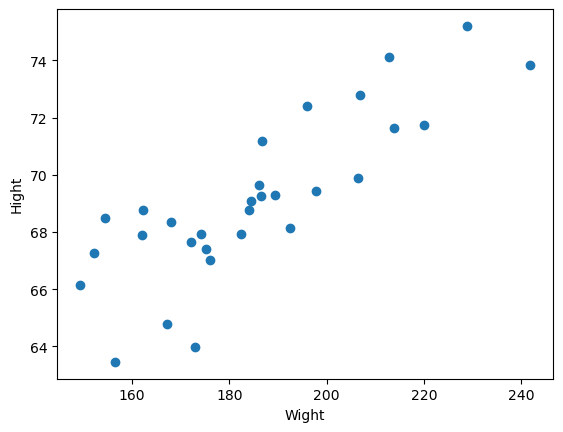

In [7]:
plt.scatter(df_1['Weight'],df_1['Height'])
plt.xlabel('Wight')
plt.ylabel('Hight')
plt.show()

In [8]:
## drive our data into dependent and independent feature
x = df[['Height']] # height is indepndent feature
y = df['Weight']  # weight is dependent feature

In [9]:
df

,Gender,Height,Weight
0,Male,73,241
1,Male,68,162
2,Male,74,212
3,Male,71,220
4,Male,69,206
...,...,...,...
9995,Female,66,136
9996,Female,67,170
9997,Female,63,128
9998,Female,69,163


### Web = https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [10]:
### secand step 2. Train test split of the dataset/
from sklearn.model_selection import train_test_split

In [11]:
## train test split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [12]:
x.shape

(10000, 1)

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 1), (2000, 1), (8000,), (2000,))

In [14]:
## 3. Standardize the dataset train independent data
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
x_train

,Height
9254,61
1561,74
1670,68
6087,65
6669,67
...,...
5734,63
5191,58
5390,64
860,69


In [17]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Text(0, 0.5, 'y_train')

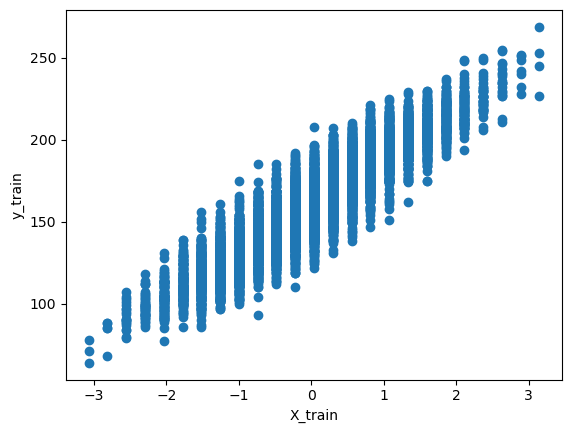

In [18]:
plt.scatter(x_train,y_train)
plt.xlabel("X_train")
plt.ylabel("y_train")

### Wep = https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [19]:
## train the linear Regression Model
from sklearn.linear_model import LinearRegression



In [20]:
## creat the regression object 
regression = LinearRegression()

In [21]:
regression.fit(x_train,y_train)

LinearRegression()

In [22]:
## slop is 
print('this slop or cofficient of weight is ',regression.coef_)
print("thisintercapt is : ",regression.intercept_)

this slop or cofficient of weight is  [29.53028291]
thisintercapt is :  160.82275000000004


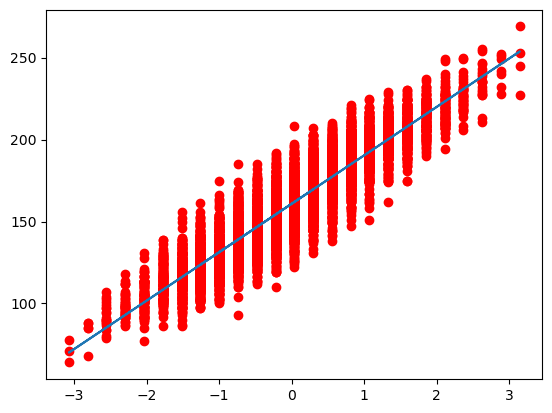

In [23]:
# creat the best fit line
plt.scatter(x_train,y_train,c='r')
plt.plot(x_train,regression.predict(x_train))

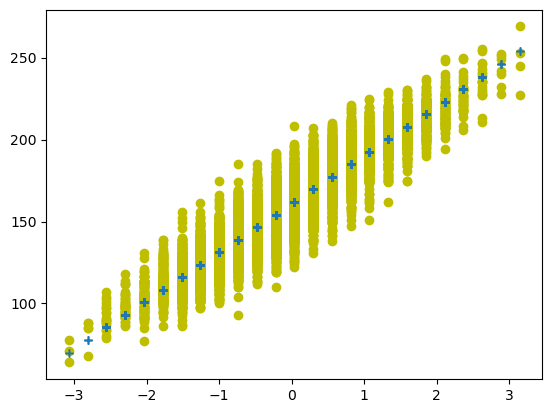

In [24]:
# creat the best fit line
plt.scatter(x_train,y_train,c='y')
plt.plot(x_train,regression.predict(x_train),'+')

In [25]:
# prediction
y_predct_test = regression.predict(x_test)

In [26]:
y_predct_test,y_test

(array([177.23445187, 177.23445187, 161.92324313, ..., 131.30082565,
        169.5788475 , 100.67840817]),
 6252    173
 4684    195
 1731    170
 4742    215
 4521    182
        ... 
 6412    142
 8285    119
 7853    125
 1095    187
 6929    102
 Name: Weight, Length: 2000, dtype: int64)

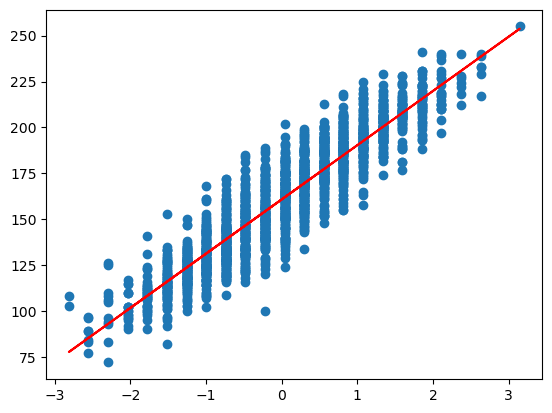

In [27]:
plt.scatter(x_test,y_test)
plt.plot(x_test,regression.predict(x_test),'r')

# Performence metrics
## SME.MAE,RMSE
### R squar and adjected R Squar

### Web = https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [30]:
mse = mean_squared_error(y_test,y_predct_test)
mae = mean_absolute_error(y_test,y_predct_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

154.9438413261233
9.866549207785887
12.447644007045


In [31]:
from sklearn.metrics import r2_score

In [34]:
score = r2_score(y_test,y_predct_test)
print(score)

0.852037968164328


In [36]:
regression

LinearRegression()

In [39]:
## new data point weight is 80

scarled_weight = scaler.transform([[80]])
scarled_weight

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[3.66670901]])

In [42]:
regression.predict([scarled_weight[0]])

array([269.1017043])

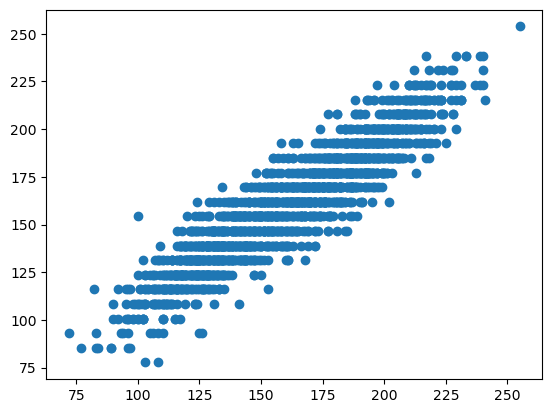

In [43]:
plt.scatter(y_test,y_predct_test)

In [44]:
residuals = y_test-y_predct_test
residuals


6252    -4.234452
4684    17.765548
1731     8.076757
4742    14.798735
4521    12.421153
          ...    
6412   -12.267639
8285     3.010383
7853    -6.300826
1095    17.421153
6929     1.321592
Name: Weight, Length: 2000, dtype: float64

In [52]:
import seaborn as sns
sns.distplot(residuals.kind='kde')

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (4164851670.py, line 2)

<AxesSubplot: xlabel='Weight', ylabel='Count'>

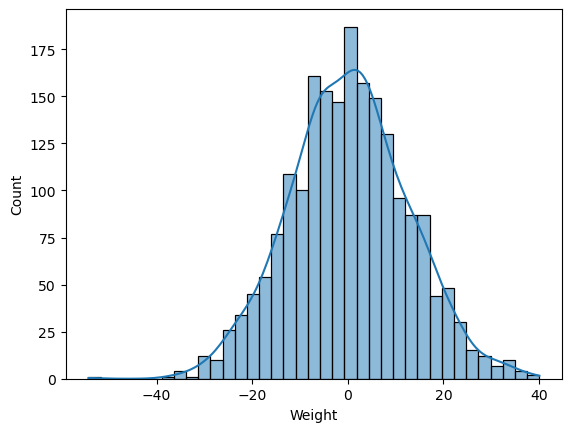

In [54]:
import seaborn as sns

import warnings

# पुरानी विधि का उपयोग करते समय warning को ignore कर सकते हैं
sns.histplot(residuals, kde=True)
